## Fase 6 – Visualización de Datos

Usar matplotlib y pandas para mostrar:

1.	Gráfico de barras: número de pacientes atendidos por servicio.
2.	Gráfico circular: distribución por sexo.
3.	Histograma: distribución de edades.
4.	Reporte tabular: promedio de montos por distrito.


#### Importamos las librerías necesarias y cargar los datos

In [12]:
import pandas as pd
from pymongo import MongoClient
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

# Conexión a MongoDB
client = MongoClient("mongodb://localhost:27017/")
db = client["SaludDigital_2025"]
collection = db["pacientes"]

# Leer datos desde MongoDB
data = list(collection.find({}, {"_id": 0}))
df = pd.DataFrame(data)

print("Datos cargados desde MongoDB correctamente.")
print(f"Total de registros: {len(df)}\n")
print("Vista previa de los datos:\n")
print(df.head())

# Crear carpeta de reportes
reports_path = Path.cwd() / "../reports"
reports_path.mkdir(parents=True, exist_ok=True)

Datos cargados desde MongoDB correctamente.
Total de registros: 3000

Vista previa de los datos:

  id_paciente           nombre  edad sexo                distrito  \
0       P0001     Andrés Rojas    88    M                   Lince   
1       P0002  Gabriela Torres    54    M  San Juan de Lurigancho   
2       P0003  Andrés Guerrero    86    M  San Juan de Lurigancho   
3       P0004       Lucía Cruz    12    M                   Surco   
4       P0005       Sin Nombre    26    M             Desconocido   

           servicio fecha_atencion   monto  
0       Cardiología     2024-05-31  130.93  
1  Consulta General     2024-10-09  798.43  
2         Pediatría     2024-12-16  962.96  
3       Odontología     2024-12-20  340.02  
4       Odontología     2024-01-01  835.66  


### Grafico de Barras: Pacientes Atendidos por servicio

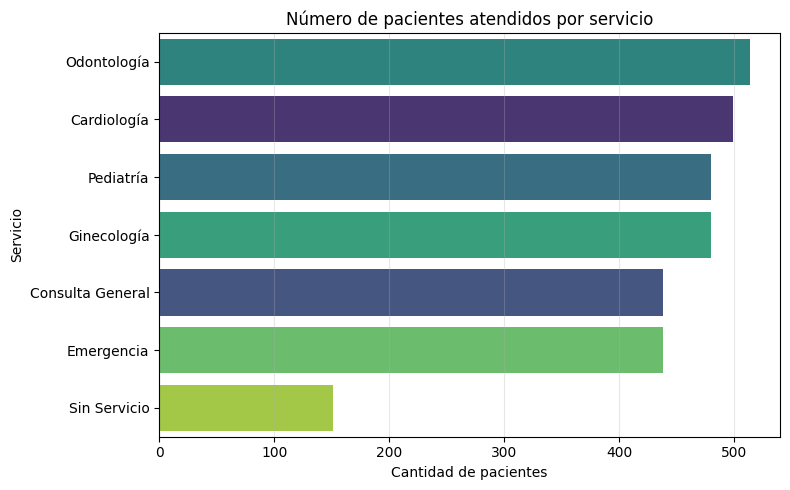

In [13]:
plt.figure(figsize=(8, 5))
sns.countplot(
    y="servicio",
    data=df,
    order=df["servicio"].value_counts().index,
    palette="viridis",
    hue="servicio",
    legend=False
)
plt.title("Número de pacientes atendidos por servicio")
plt.xlabel("Cantidad de pacientes")
plt.ylabel("Servicio")
plt.grid(axis='x', alpha=0.3)
plt.tight_layout()
plt.savefig(reports_path / "pacientes_atendidos_por_servicio.png")
plt.show()

### Gráfico Circular : Distribución por sexo

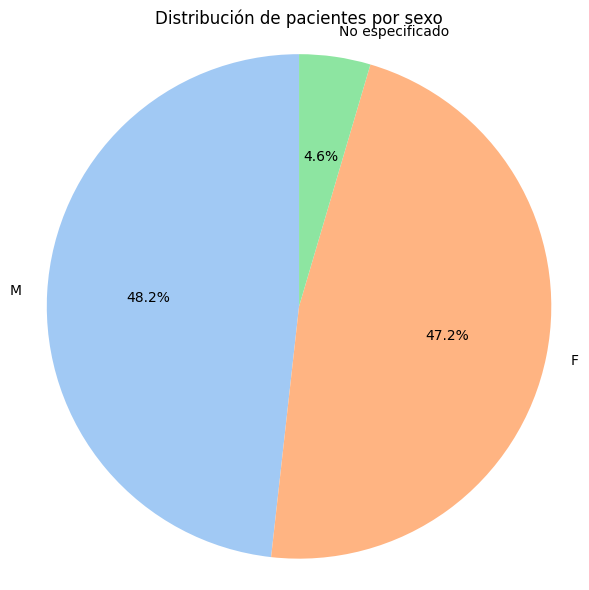

In [14]:
sexo_counts = df["sexo"].value_counts()
plt.figure(figsize=(6, 6))
plt.pie(sexo_counts, labels=sexo_counts.index, autopct="%1.1f%%", startangle=90, colors=sns.color_palette("pastel"))
plt.title("Distribución de pacientes por sexo")
plt.axis("equal")
plt.tight_layout()
plt.savefig(reports_path / "distribucion_por_sexo.png")
plt.show()

### Histograma: Distribución de edades


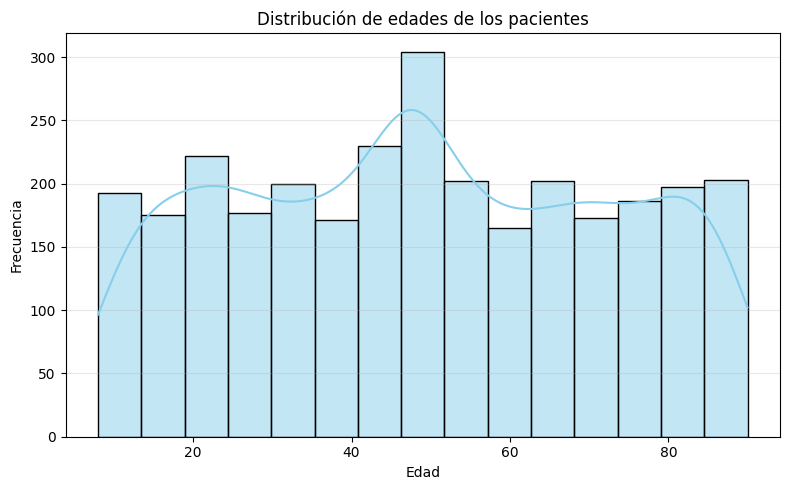

In [15]:
plt.figure(figsize=(8, 5))
sns.histplot(df["edad"].dropna(), bins=15, kde=True, color="skyblue")
plt.title("Distribución de edades de los pacientes")
plt.xlabel("Edad")
plt.ylabel("Frecuencia")
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.savefig(reports_path / "distribución_de_edades.png")
plt.show()

### Reporte Tabular: Promedio de Montos por Distrito

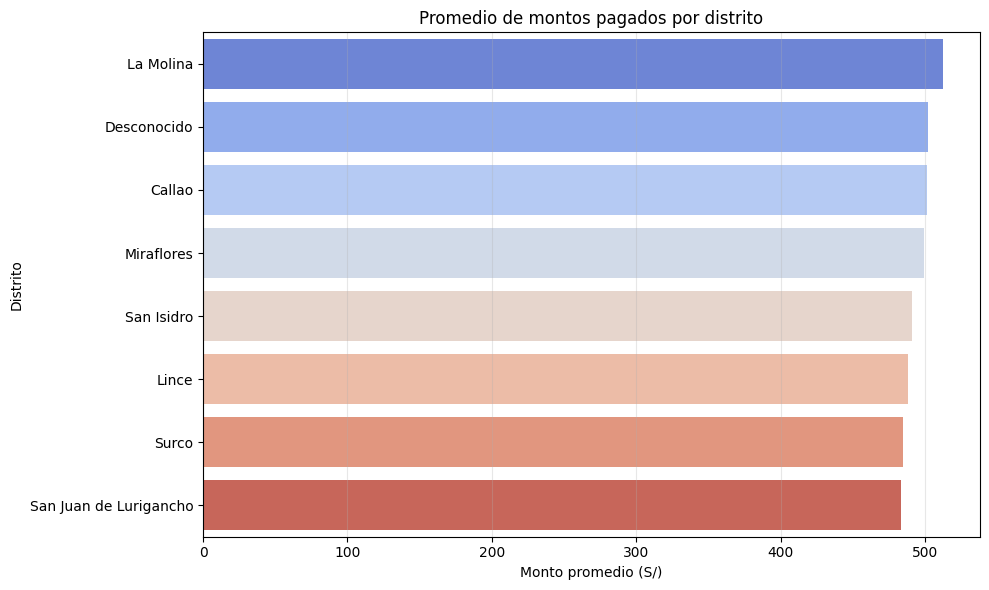


Promedio de montos por distrito:
              Distrito  PromedioMonto
             La Molina     512.320096
           Desconocido     502.000382
                Callao     501.243806
            Miraflores     499.432424
            San Isidro     490.845943
                 Lince     487.868426
                 Surco     484.687975
San Juan de Lurigancho     483.189424


In [16]:
promedio_distrito = df.groupby("distrito")["monto"].mean().sort_values(ascending=False)
df_prom = promedio_distrito.reset_index()
df_prom.columns = ["Distrito", "PromedioMonto"]

plt.figure(figsize=(10, 6))
sns.barplot(
    data=df_prom,
    x="PromedioMonto",
    y="Distrito",
    hue="Distrito",
    palette="coolwarm",
    legend=False
)
plt.title("Promedio de montos pagados por distrito")
plt.xlabel("Monto promedio (S/)")
plt.ylabel("Distrito")
plt.grid(axis='x', alpha=0.3)
plt.tight_layout()
plt.savefig(reports_path / "promedio_de_montos_por_distrito.png")
plt.show()

# Mostrar tabla en consola
print("\nPromedio de montos por distrito:")
print(df_prom.to_string(index=False))